In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="ticks")

# РК1
## Тема: Методы обработки данных.
## Студент: Королев Святослав Владимирович
## Группа: ИУ5-23М
## Номер по списку группы (вариант): 6
### Вариант задачи №1 - 6
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

### Вариант задачи №2 - 26
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

### Дополнительное задание (по группам)
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

# Задача 1 (№6)
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

> Загрузка набора данных с характеристиками самолетов

In [31]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Aiplane_BlueBook.csv')
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


> Использование SimpleImputer для заполнения значений

In [32]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [34]:
all_data, filled_data, missed_data = impute_column(data, 'Fuel gal/lbs', 'mean')
all_data[:20]

array([ 36.,  15.,  19.,  19.,  14.,  15., 165., 165., 165., 165., 174.,
       165.,  80.,  80.,  64.,  46.,  46.,  64.,  46.,  46.])

> Пропуски были заполнены средним значением

In [35]:
filled_data

array([2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965, 2511.82403965, 2511.82403965,
       2511.82403965, 2511.82403965])

In [36]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [37]:
data['Fuel imputed'] = all_data.tolist()

> Среднее значение колонки 

In [38]:
data['Fuel gal/lbs'].mean()

2511.824039653036

> Фрагмент набора данных с новыми значениями колонок

In [39]:
data.loc[data['Max speed Knots'].isna(), ['Model','Fuel gal/lbs','Fuel imputed']].sample(5, random_state = 1)

,Model,Fuel gal/lbs,Fuel imputed
815,Piper PA-23-250 Aztec,NaN,2511.82404
505,Merlin II B,386.0,386.00000
816,"Piper PA-34 Seneca I,II",NaN,2511.82404
804,"Cessna 337 (turbo, pressurized)",NaN,2511.82404
506,Merlin II A,386.0,386.00000


> Визуализация статистических показателей колонки

In [41]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

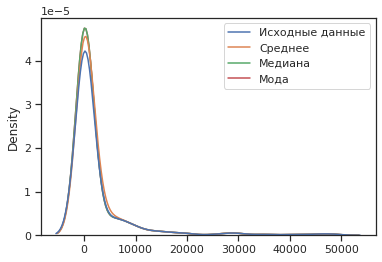

In [42]:
research_impute_numeric_column(data, 'Fuel gal/lbs')

# Задача 2 (№26)
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

> Загрузка набора данных с характеристиками самолетов без пропусков:

In [43]:
data = pd.read_csv('/content/drive/MyDrive/datasets/cleaned_data_airplanes.csv')

> Удаление лишних колонок:

In [44]:
data = data.drop(['Range N.M._log', 'Range N.M._reciprocal',
       'Range N.M._sqr', 'Range N.M._exp1', 'Range N.M._exp2',
       'Range N.M._exp3', 'Range N.M._exp4', 'Range N.M._boxcox', 'row_num'], axis = 1)

> Вид набора данных:

In [45]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,All eng rate of climb,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
0,15 AC Sedan,Aeronca,Piston,145,104,91.0,46.0,450,2050,1180.0,25/3,10/3,37/5,370.0,36.0,13000.0,900.0,1013.678850,1300.0,572.706741
1,11 CC Super Chief,Aeronca,Piston,85,89,83.0,44.0,600,1350,820.0,20/7,8/9,36/1,190.0,15.0,12300.0,720.0,907.323545,800.0,537.637167
2,7 CCM Champ,Aeronca,Piston,90,90,78.0,37.0,650,1300,810.0,21/5,8/7,35/0,210.0,19.0,16000.0,475.0,1071.689468,850.0,634.209014
3,7 DC Champ,Aeronca,Piston,85,88,78.0,37.0,620,1300,800.0,21/5,8/7,35/0,210.0,19.0,13000.0,500.0,1060.980507,850.0,672.914759
4,7 AC Champ,Aeronca,Piston,65,83,74.0,33.0,370,1220,740.0,21/5,8/9,35/0,175.0,14.0,12500.0,632.0,990.702907,885.0,565.608815


> Информация о наборе данных:

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    615 non-null    object 
 1   Company                  615 non-null    object 
 2   Engine Type              615 non-null    object 
 3   HP or lbs thr ea engine  615 non-null    object 
 4   Max speed Knots          615 non-null    object 
 5   Rcmnd cruise Knots       615 non-null    float64
 6   Stall Knots dirty        615 non-null    float64
 7   All eng rate of climb    615 non-null    object 
 8   Gross weight lbs         615 non-null    object 
 9   Empty weight lbs         615 non-null    float64
 10  Length ft/in             615 non-null    object 
 11  Height ft/in             615 non-null    object 
 12  Wing span ft/in          615 non-null    object 
 13  Range N.M.               615 non-null    float64
 14  Fuel gal/lbs             6

> Функция вывода графиков, описывающих данные в определенной колонке:

In [47]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,10))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

> Графики, описывающие колонку `Empty weight lbs`:

Наблюдается большое количество выбросов на большом диапазоне до `40000`

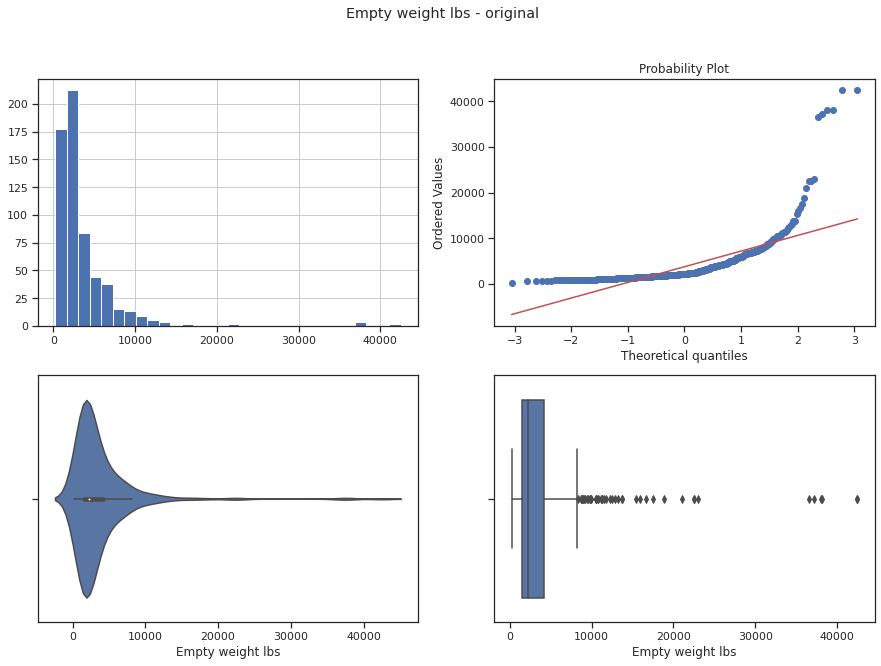

In [48]:
diagnostic_plots(data, 'Empty weight lbs', 'Empty weight lbs - original')

> Удаление выбросов в колонке `Empty weight lbs`:

В результате число выбросов уменьшилось, максимальный выброс в районе `17500` вместо `40000`

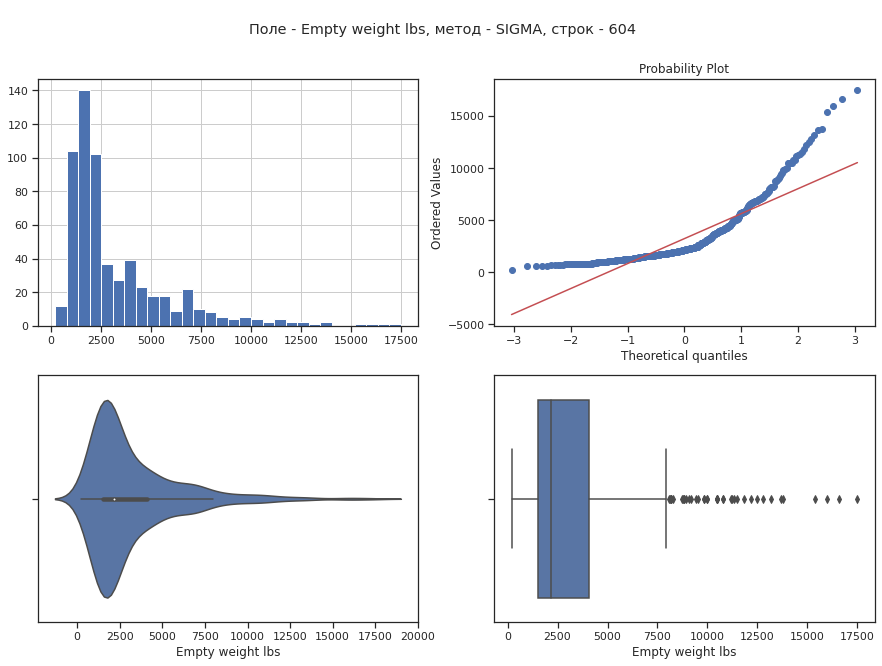

In [49]:
# Вычисление верхней и нижней границы
K1 = 3
lower_boundary = data['Empty weight lbs'].mean() - (K1 * data['Empty weight lbs'].std())
upper_boundary = data['Empty weight lbs'].mean() + (K1 * data['Empty weight lbs'].std())
# Флаги для удаления выбросов
outliers_temp = np.where(data['Empty weight lbs'] > upper_boundary, True, 
                          np.where(data['Empty weight lbs'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = '\nПоле - {}, метод - {}, строк - {}'.format('Empty weight lbs', 'SIGMA', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'Empty weight lbs', title)

# Дополнительное задание
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

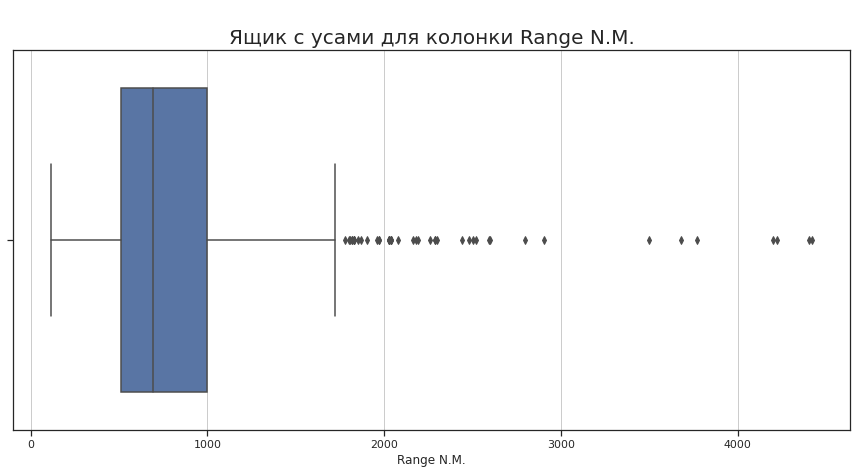

In [50]:
plt.figure(figsize = (15, 7))
plt.grid()
plt.title('\nЯщик с усами для колонки Range N.M.', {'fontsize' : 20})
sns.boxplot(x = data['Range N.M.']) 